In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)
plt.rcParams.update({'font.size': 14})

In [1]:
save_file = open('data0928/daily_data_matrix_all_0928.npy','rb')
raw_indicator = np.load(save_file)
raw_preds = np.load(save_file)
raw_conf = np.load(save_file)
raw_wager = np.load(save_file)
raw_se = np.load(save_file)
raw_truth = np.load(save_file)
raw_openday = np.load(save_file)
raw_user_type = np.load(save_file)
raw_user_id = np.load(save_file)
raw_preds_age = np.load(save_file)
save_file.close()

ifps_data = pd.read_csv("data0928/ifps0928_refined.csv")
raw_ifps_type = ifps_data['type'].values

In [98]:
print(raw_preds.shape)
# number of active users of each grounp
print("# of active users of each grounp")
n_volu, n_Turk, n_ctrl = np.sum(raw_user_type==1), np.sum(raw_user_type==2), np.sum(raw_user_type==3)
print(n_volu, n_Turk, n_ctrl)

# number of IFPs answered of each user
n_IFPs_of_each_user = np.sum(raw_preds[-1,:,:,0]>-0.1, axis=0)
print("# of IFPs answered of each user (Mean / Median / Max)")
for i in [1,2,3]:
    samples = n_IFPs_of_each_user[raw_user_type==i]
    print(np.mean(samples), '/', np.median(samples), '/', np.max(samples))
    
# number of forecasts of each user
n_fcasts_of_each_user = np.sum(np.sum(raw_preds_age[:,:,:]==0, axis=0), axis=0)
print("# of forecasts of each user (Mean / Median / Max)")
for i in [1,2,3]:
    samples = n_fcasts_of_each_user[raw_user_type==i]
    print(np.mean(samples), '/', np.median(samples), '/', np.max(samples))
    
# number of IFPs covered each grounp
print("# of IFPs covered each grounp")
for i in [1,2,3]:
    curr_preds = raw_preds[-1,:,:,0]
    curr_preds = curr_preds[:, raw_user_type==i]
    print(np.sum(np.sum(curr_preds>-0.1, axis=1)>0))
    
# number of users of each IFP
print("# of users of each IFP (Mean / Median / Max)")
for i in [1,2,3]:
    curr_preds = raw_preds[-1,:,:,0]
    curr_preds = curr_preds[:, raw_user_type==i]
    samples = np.sum(curr_preds>-0.1, axis=1)
    print(np.mean(samples), '/', np.median(samples), '/', np.max(samples))
    
# number of fcasts of each IFP
print("# of fcasts of each IFP (Mean / Median / Max)")
n_fcasts_of_each_IFP = np.sum(np.sum(raw_preds_age[:,:,:]==0, axis=0), axis=0)
for i in [1,2,3]:
    curr_preds_age = raw_preds_age[:,:,raw_user_type==i]
    samples = np.sum(np.sum(curr_preds_age==0, axis=0), axis=1)
    print(np.mean(samples), '/', np.median(samples), '/', np.max(samples))

(185, 191, 2353, 5)
# of active users of each grounp
410 768 1175
# of IFPs answered of each user (Mean / Median / Max)
9.79756097561 / 4.0 / 188
36.9778645833 / 47.5 / 76
40.730212766 / 36.0 / 191
# of forecasts of each user (Mean / Median / Max)
14.4951219512 / 4.0 / 199
39.4309895833 / 51.0 / 81
55.4953191489 / 40.0 / 7310
# of IFPs covered each grounp
191
164
191
# of users of each IFP (Mean / Median / Max)
21.0314136126 / 11.0 / 123
148.685863874 / 116.0 / 468
250.565445026 / 241.0 / 563
# of fcasts of each IFP (Mean / Median / Max)
31.1151832461 / 14.0 / 244
158.54973822 / 129.0 / 536
341.397905759 / 361.0 / 642


In [78]:
se_marked_with_nan = np.array(raw_se)
se_marked_with_nan[se_marked_with_nan<-0.1] = np.NAN
se_marked_with_nan[raw_openday<1] = np.NAN
#nan_mark = 1.0 * np.ones_like(raw_openday)
#nan_mark[raw_openday<-0.1] = np.NAN
#se_marked_with_nan *= nan_mark[:, :, None]
rel_marked_se = se_marked_with_nan - np.nanmedian(se_marked_with_nan, axis=2)[:, :, None]
avg_daily_se = np.nanmean(se_marked_with_nan, axis=0)
rel_avg_daily_se = np.nanmean(rel_marked_se, axis=0)

/Users/heliaguin/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:879: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/heliaguin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/heliaguin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


/Users/heliaguin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


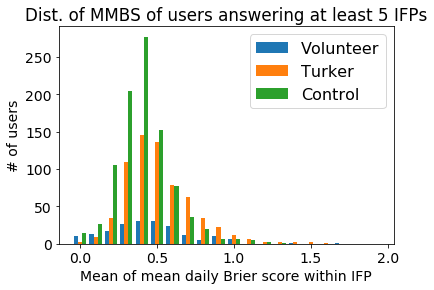

([array([ 10.,  13.,  17.,  26.,  31.,  31.,  24.,  12.,   5.,  11.,   7.,
         0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.]), array([   3.,    9.,   35.,  110.,  145.,  136.,   78.,   62.,   35.,
         23.,   12.,    7.,    3.,    2.,    2.,    2.,    1.,    0.,
          0.,    0.]), array([  15.,   27.,  106.,  204.,  277.,  152.,   77.,   36.,   20.,
          7.,    6.,    5.,    2.,    1.,    0.,    0.,    0.,    0.,
          0.,    0.])], array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]), <a list of 3 Lists of Patches objects>)


/Users/heliaguin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


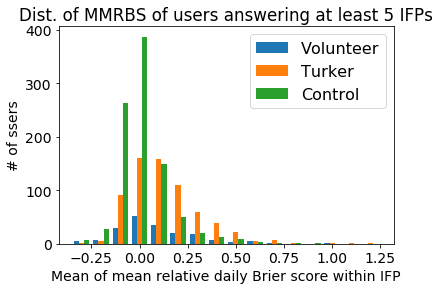

([array([  6.,   7.,  30.,  52.,  36.,  20.,  19.,   7.,   4.,   5.,   1.,
         0.,   0.,   2.,   0.,   0.]), array([   1.,    5.,   91.,  160.,  159.,  110.,   59.,   38.,   22.,
          5.,    8.,    2.,    0.,    2.,    2.,    1.]), array([   7.,   28.,  263.,  387.,  149.,   50.,   21.,   13.,    9.,
          4.,    1.,    1.,    2.,    0.,    0.,    0.])], array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,
        0.8,  0.9,  1. ,  1.1,  1.2,  1.3]), <a list of 3 Lists of Patches objects>)


/Users/heliaguin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/Users/heliaguin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/heliaguin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


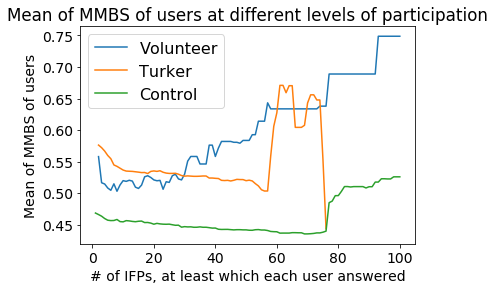

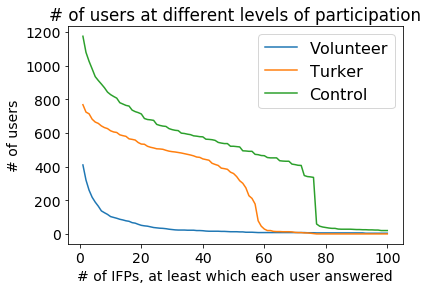

In [97]:
samples = np.nanmean(avg_daily_se, axis=0)
samples[n_IFPs_of_each_user<5]= np.NAN

volu = (raw_user_type==1) & (n_IFPs_of_each_user>=5)
turk = (raw_user_type==2) & (n_IFPs_of_each_user>=5)
cntr = (raw_user_type==3) & (n_IFPs_of_each_user>=5)
plt.figure(1)
hist_rtn = plt.hist([samples[volu], samples[turk], samples[cntr]], bins=np.linspace(0, 2, 21), align='left',
                    label=['Volunteer', 'Turker', 'Control'])
plt.legend(fontsize=16)
plt.xlabel('Mean of mean daily Brier score within IFP')
plt.ylabel('# of users')
plt.title('Dist. of MMBS of users answering at least 5 IFPs')
plt.savefig('fig0928/Dist_of_MMBS_of_users.jpg', dpi=300, bbox_inches='tight')
plt.show()
print(hist_rtn)

samples = np.nanmean(rel_avg_daily_se, axis=0)
samples[n_IFPs_of_each_user<5]= np.NAN

volu = (raw_user_type==1) & (n_IFPs_of_each_user>=5)
turk = (raw_user_type==2) & (n_IFPs_of_each_user>=5)
cntr = (raw_user_type==3) & (n_IFPs_of_each_user>=5)
plt.figure(1)
hist_rtn = plt.hist([samples[volu], samples[turk], samples[cntr]], bins=np.linspace(-0.3, 1.3, 17), align='left',
                    label=['Volunteer', 'Turker', 'Control'])
plt.legend(fontsize=16)
plt.xlabel('Mean of mean relative daily Brier score within IFP')
plt.ylabel('# of ssers')
plt.title('Dist. of MMRBS of users answering at least 5 IFPs')
plt.savefig('fig0928/Dist_of_MMRBS_of_users.jpg', dpi=300, bbox_inches='tight')
plt.show()
print(hist_rtn)



plt.figure(2)
labels = ['Volunteer', 'Turker', 'Control']
samples = np.nanmean(avg_daily_se, axis=0)
for i in [1,2,3]:
    
    tmp = samples[raw_user_type==i]
    num = n_IFPs_of_each_user[raw_user_type==i]
    plt.plot(np.arange(1, 101), [np.mean(tmp[num>j]) for j in range(100)], label=labels[i-1])
    
plt.legend(fontsize=16)
plt.xlabel('# of IFPs, at least which each user answered')
plt.ylabel('Mean of MMBS of users')
plt.title('Mean of MMBS of users at different levels of participation')
plt.savefig('fig0928/Mean_of_MMBS_at_different_levels_of_participation.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.close('All')

plt.figure(3)
labels = ['Volunteer', 'Turker', 'Control']
for i in [1,2,3]:
    num = n_IFPs_of_each_user[raw_user_type==i]
    plt.plot(np.arange(1, 101), [np.sum(num>j) for j in range(100)], label=labels[i-1])
    
plt.legend(fontsize=16)
plt.xlabel('# of IFPs, at least which each user answered')
plt.ylabel('# of users')
plt.title('# of users at different levels of participation')
plt.savefig('fig0928/number_of_users_at_different_levels_of_participation.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.close('All')

    

([array([  8.,  25.,  76.,  35.,  25.,  11.,   4.,   3.,   0.,   2.,   0.]), array([   3.,   65.,  233.,  184.,   99.,   43.,   21.,   10.,    2.,
          2.,    3.]), array([  13.,  204.,  512.,  138.,   38.,   19.,    7.,    2.,    0.,
          2.,    0.])], array([-0.29, -0.15, -0.02,  0.12,  0.26,  0.4 ,  0.53,  0.67,  0.81,
        0.95,  1.08,  1.22]), <a list of 3 Lists of Patches objects>)


In [2]:
openday = raw_openday[:]
ifps_type = raw_ifps_type[:]
truth = raw_truth[:]


#valid = raw_user_type==1
turk = raw_user_type==2
control = raw_user_type==3
#valid = raw_user_type>0
#indicator = raw_indicator[:, :, valid]
preds = raw_preds[:, :, valid]
conf = raw_conf[:, :, valid]
wager = raw_wager[:, :, valid]
se = raw_se[:, :, valid]
user_type = raw_user_type[valid]
preds_age = raw_preds_age[:, :, valid]


#print(preds)
print(ifps_type)
print(truth)
print(preds.shape)
print(conf.shape)
print(wager.shape)
print(se.shape)
print(openday.shape)
print(preds_age.shape)
#print(agg_preds.shape)
#print(openday[35:70].T)
#print(agg_openday[35:70].T)
#print(ifps_data[['map_id','type']])

[2 5 2 2 3 5 2 5 3 5 5 2 5 5 5 2 2 2 2 2 5 5 2 5 5 3 5 2 5 2 2 5 5 5 4 2 4
 5 2 2 5 5 5 5 3 5 5 5 2 2 5 5 5 3 2 2 4 2 2 2 2 2 2 4 3 2 3 5 2 2 5 2 4 2
 5 2 2 3 5 3 3 2 5 4 2 2 2 3 2 4 3 2 2 2 2 3 5 3 5 2 3 3 5 2 2 2 2 3 2 2 5
 5 3 5 3 3 5 5 2 5 2 2 2 3 5 2 2 3 3 2 3 5 5 2 3 2 5 2 2 2 5 5 2 2 3 5 4 2
 2 2 5 2 5 2 2 4 5 2 2 3 5 2 2 5 2 3 5 2 5 2 5 5 2 2 2 2 5 5 5 2 5 5 5 2 2
 2 2 2 2 5 5]
[  2.   3.   2.   2.   1.   4.   2.   4.   2.   1.   5.   2.   2.   2.   1.
   2.   2.   2.   2.   2.   5.   3.   2.   4.   1.   2.   5.   2.   1.   1.
   1.   5.   4.  nan   3.   2.   4.   1.   2.   2.   1.   3.   1.   4.   1.
   2.   2.   5.   2.   2.   2.   3.   3.   3.   1.   2.   4.   2.   2.   1.
   2.   1.   2.   1.   3.   2.   2.   5.   2.   1.   2.   2.   1.   2.   3.
   2.   1.   1.   3.  nan   2.   2.   4.   3.   2.   2.   1.   2.   1.   1.
   3.   1.   2.   2.   1.   1.   3.   3.   4.   1.   2.   1.  nan   2.   2.
   1.   2.   2.   1.   1.   4.   5.   1.   1.   3.   1.   5.   5.   2.   3.
   

Total number of predictions:
539 777 3338
# of answerred questions:
26 19 26
Ratio of users answering at least 3 questions:
31/195 15/397 240/859
Average # of predictions on a question:
20.7307692308 40.8947368421 128.384615385


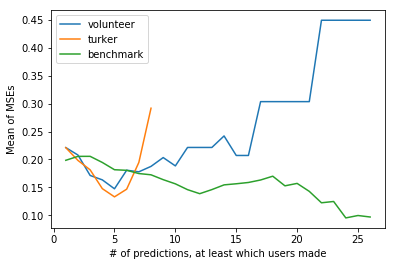

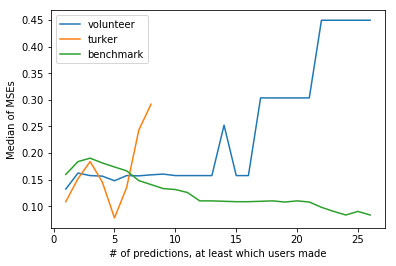

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
save_file = open('preprocessed_HFC_data_matrix_volunteer.npy','rb')
preds_vol = np.load(save_file)
conf_vol = np.load(save_file)
wager_vol = np.load(save_file)
mse_vol = np.load(save_file)
save_file.close()
#valid_wager = wager > -0.1 
#valid_wager[:, np.max(wager, axis=0)<0.1] = False # mark users predict but never wager

save_file = open('preprocessed_HFC_data_matrix_turk.npy','rb')
preds_tur = np.load(save_file)
conf_tur = np.load(save_file)
wager_tur = np.load(save_file)
mse_tur = np.load(save_file)
save_file.close()

save_file = open('preprocessed_HFC_data_matrix_benchmark.npy','rb')
preds_ben = np.load(save_file)
conf_ben = np.load(save_file)
wager_ben = np.load(save_file)
mse_ben = np.load(save_file)
save_file.close()


print("Total number of predictions:")
print(np.sum(preds_vol>-0.1), np.sum(preds_tur>-0.1), np.sum(preds_ben>-0.1))
print("# of answerred questions:")
print(np.sum(np.sum(preds_vol>-0.1, axis=1)>0),
      np.sum(np.sum(preds_tur>-0.1, axis=1)>0),
      np.sum(np.sum(preds_ben>-0.1, axis=1)>0)
     )
print("Ratio of users answering at least 3 questions:")
print(str(np.sum(np.sum(preds_vol>-0.1, axis=0)>=5))+'/'+str(np.sum(np.sum(preds_vol>-0.1, axis=0)>=1)), 
      str(np.sum(np.sum(preds_tur>-0.1, axis=0)>=5))+'/'+str(np.sum(np.sum(preds_tur>-0.1, axis=0)>=1)),
      str(np.sum(np.sum(preds_ben>-0.1, axis=0)>=5))+'/'+str(np.sum(np.sum(preds_ben>-0.1, axis=0)>=1))
     )


ans_vol = np.sum(preds_vol>-0.1, axis=0)
ans_tur = np.sum(preds_tur>-0.1, axis=0)
ans_ben = np.sum(preds_ben>-0.1, axis=0)

weight_vol = np.ones_like(mse_vol)
weight_tur = np.ones_like(mse_tur)
weight_ben = np.ones_like(mse_ben)
weight_vol[mse_vol < -0.1] = 0
weight_tur[mse_tur < -0.1] = 0
weight_ben[mse_ben < -0.1] = 0

print("Average # of predictions on a question:")
print(np.sum(preds_vol>-0.1) / 26, 
      np.sum(preds_tur>-0.1) / 19,
      np.sum(preds_ben>-0.1) / 26,
     )

#print("Average mse:")
#print(np.mean(np.average(mse_vol[:, ans_vol>=1], weights=weight_vol[:, ans_vol>=1], axis=0)),
#      np.mean(np.average(mse_tur[:, ans_tur>=1], weights=weight_tur[:, ans_tur>=1], axis=0)),
#      np.mean(np.average(mse_ben[:, ans_ben>=1], weights=weight_ben[:, ans_ben>=1], axis=0))
#     )
#print("Median mse:")
#print(np.median(np.average(mse_vol[:, ans_vol>=1], weights=weight_vol[:, ans_vol>=1], axis=0)),
#      np.median(np.average(mse_tur[:, ans_tur>=1], weights=weight_tur[:, ans_tur>=1], axis=0)),
#      np.median(np.average(mse_ben[:, ans_ben>=1], weights=weight_ben[:, ans_ben>=1], axis=0))
#     )

plt.figure(4)
plt.plot(np.arange(1, max(ans_vol)+1), 
         [np.mean(np.average(mse_vol[:, ans_vol>=i], weights=weight_vol[:, ans_vol>=i], axis=0)) 
          for i in np.arange(1, max(ans_vol)+1)],
         label = 'volunteer'
        )
plt.plot(np.arange(1, max(ans_tur)+1), 
         [np.mean(np.average(mse_tur[:, ans_tur>=i], weights=weight_tur[:, ans_tur>=i], axis=0)) 
          for i in np.arange(1, max(ans_tur)+1)],
         label = 'turker'
        )
plt.plot(np.arange(1, max(ans_ben)+1), 
         [np.mean(np.average(mse_ben[:, ans_ben>=i], weights=weight_ben[:, ans_ben>=i], axis=0)) 
          for i in np.arange(1, max(ans_ben)+1)],
         label = 'benchmark'
        )
plt.xlabel('# of predictions, at least which users made')
plt.ylabel('Mean of MSEs')
plt.legend()
plt.show()

plt.figure(5)
plt.plot(np.arange(1, max(ans_vol)+1), 
         [np.median(np.average(mse_vol[:, ans_vol>=i], weights=weight_vol[:, ans_vol>=i], axis=0)) 
          for i in np.arange(1, max(ans_vol)+1)],
         label = 'volunteer'
        )
plt.plot(np.arange(1, max(ans_tur)+1), 
         [np.median(np.average(mse_tur[:, ans_tur>=i], weights=weight_tur[:, ans_tur>=i], axis=0)) 
          for i in np.arange(1, max(ans_tur)+1)],
         label = 'turker'
        )
plt.plot(np.arange(1, max(ans_ben)+1), 
         [np.median(np.average(mse_ben[:, ans_ben>=i], weights=weight_ben[:, ans_ben>=i], axis=0)) 
          for i in np.arange(1, max(ans_ben)+1)],
         label = 'benchmark'
        )
plt.xlabel('# of predictions, at least which users made')
plt.ylabel('Median of MSEs')
plt.legend()
plt.show()

plt.close('All')

#tmp = refined_mse_vol[:,2]
#print(np.mean(tmp[tmp>=-0.1]))
#print(tmp)
#print(preds_vol[:, np.sum(preds_vol>-0.1, axis=0)>0][:,2])
#print(preds_vol[:,:10])
#print(np.average(refined_mse_vol, weights=weight_vol, axis=0))

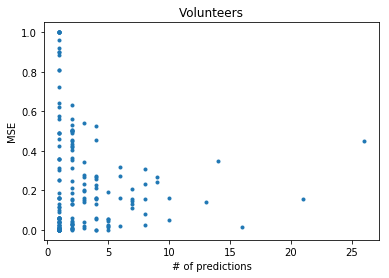

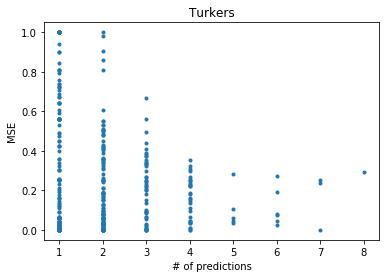

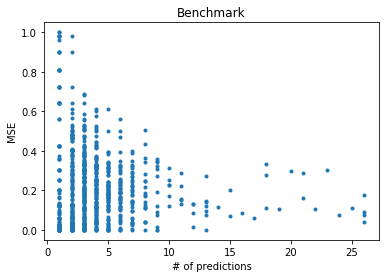

In [63]:
plt.figure(1)
plt.plot(ans_vol[ans_vol>=1], np.average(mse_vol[:, ans_vol>=1], weights=weight_vol[:, ans_vol>=1], axis=0),'.')
plt.xlabel('# of predictions')
plt.ylabel('MSE')
plt.title('Volunteers')
plt.show()

plt.figure(2)
plt.plot(ans_tur[ans_tur>=1], np.average(mse_tur[:, ans_tur>=1], weights=weight_tur[:, ans_tur>=1], axis=0),'.')
plt.xlabel('# of predictions')
plt.ylabel('MSE')
plt.title('Turkers')
plt.show()

plt.figure(3)
plt.plot(ans_ben[ans_ben>=1], np.average(mse_ben[:, ans_ben>=1], weights=weight_ben[:, ans_ben>=1], axis=0),'.')
plt.xlabel('# of predictions')
plt.ylabel('MSE')
plt.title('Benchmark')
plt.show()

plt.close('All')